Código utilizado en el video:<br>
https://youtu.be/fvx8ceK03DA

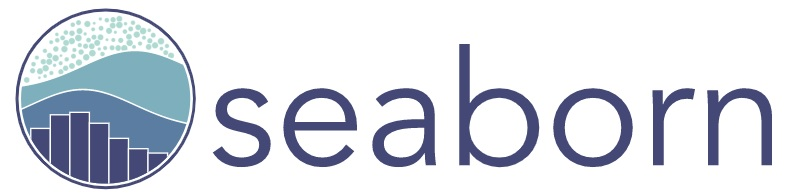

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # pip install seaborn

In [2]:
# Archivo excel con el precio promedio del m2 (dólares)
# de departamentos en venta de 2 y 3 ambientes usados y a estrenar.
# link
# https://data.buenosaires.gob.ar/dataset/mercado-inmobiliario/resource/1848cc2d-a99d-481f-aacf-b15e31986575
precios_df = pd.read_excel('precio-venta-deptos.xlsx')
precios_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7296 entries, 0 to 7295
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   barrio       7296 non-null   object 
 1   año          7296 non-null   int64  
 2   trimestre    7296 non-null   int64  
 3   precio_prom  3085 non-null   float64
 4   ambientes    7296 non-null   object 
 5   estado       7296 non-null   object 
 6   comuna       7296 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 399.1+ KB


In [3]:
precios_df = precios_df.dropna(axis=0)
precios_df.drop(['trimestre','comuna'], axis=1, inplace=True)
barrios = ['BELGRANO','NUÑEZ','PALERMO', 'RECOLETA']
precios_df = precios_df[precios_df.barrio.isin(barrios)]
precios_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 457 entries, 152 to 6535
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   barrio       457 non-null    object 
 1   año          457 non-null    int64  
 2   precio_prom  457 non-null    float64
 3   ambientes    457 non-null    object 
 4   estado       457 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 21.4+ KB


In [4]:
precios_df.head(10)

,barrio,año,precio_prom,ambientes,estado
152,BELGRANO,2010,1973.0,2 ambientes,Usado
153,BELGRANO,2010,2031.0,2 ambientes,Usado
154,BELGRANO,2010,2174.0,2 ambientes,Usado
155,BELGRANO,2010,2182.0,2 ambientes,Usado
156,BELGRANO,2011,2218.0,2 ambientes,Usado
157,BELGRANO,2011,2324.0,2 ambientes,Usado
158,BELGRANO,2011,2416.0,2 ambientes,Usado
159,BELGRANO,2011,2603.0,2 ambientes,Usado
160,BELGRANO,2012,2730.0,2 ambientes,Usado
161,BELGRANO,2012,2603.0,2 ambientes,Usado


# Regresión Lineal

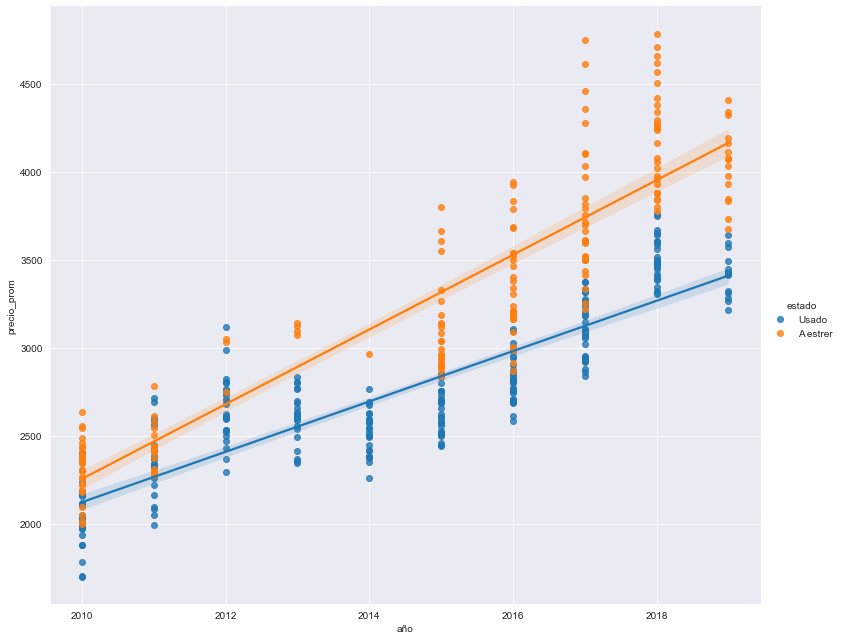

In [6]:
sns.set_style('darkgrid')
sns.lmplot(data = precios_df,
           x = 'año',
           y = 'precio_prom',
           hue = 'estado',
           height = 9,
           aspect = 1.2)

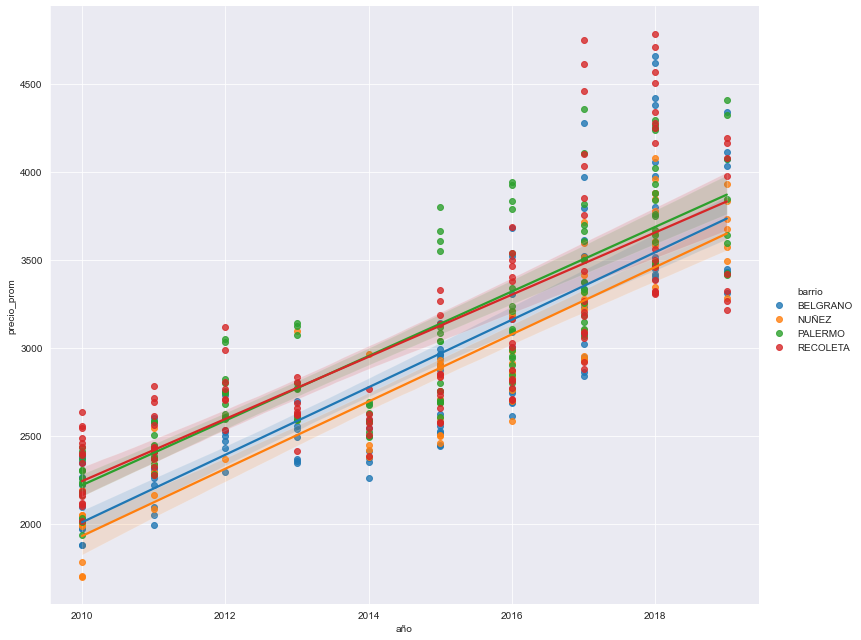

In [7]:
sns.set_style('darkgrid')
sns.lmplot(data=precios_df,
           x = 'año',
           y = 'precio_prom',
           hue = 'barrio',
           height = 9,
           aspect = 1.2)

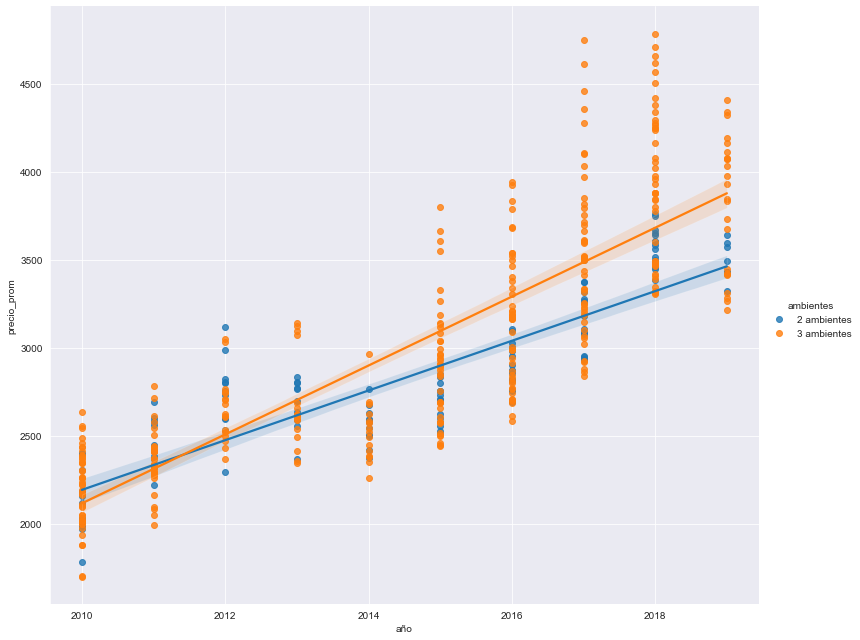

In [8]:
sns.set_style('darkgrid')
sns.lmplot(data=precios_df,
           x = 'año',
           y = 'precio_prom',
           hue = 'ambientes',
           height = 9,
           aspect = 1.2)

# Mapa de Calor

In [9]:
# Precio de cierre ajustado desde 02-01-2019 hasta 02-12-2022
# AAPL, AMZN, MSFT, GOOG
precios_acciones_df = pd.read_excel('Precios Acciones Completo.xlsx')
precios_acciones_df.set_index('Date', inplace=True)
print(precios_acciones_df.head())
print('\n')
print(precios_acciones_df.tail())

                 AAPL       AMZN       MSFT       GOOG
Date                                                  
2019-01-02  38.105141  76.956497  96.874702  52.292500
2019-01-03  34.309582  75.014000  93.310860  50.803001
2019-01-04  35.774239  78.769501  97.650703  53.535500
2019-01-07  35.694607  81.475502  97.775223  53.419498
2019-01-08  36.375061  82.829002  98.484161  53.813999


                  AAPL       AMZN        MSFT        GOOG
Date                                                     
2022-11-28  144.220001  93.949997  241.759995   96.250000
2022-11-29  141.169998  92.419998  240.330002   95.440002
2022-11-30  148.029999  96.540001  255.139999         NaN
2022-12-01  148.309998  95.500000  254.690002         NaN
2022-12-02  147.809998  94.129997  255.020004  100.830002


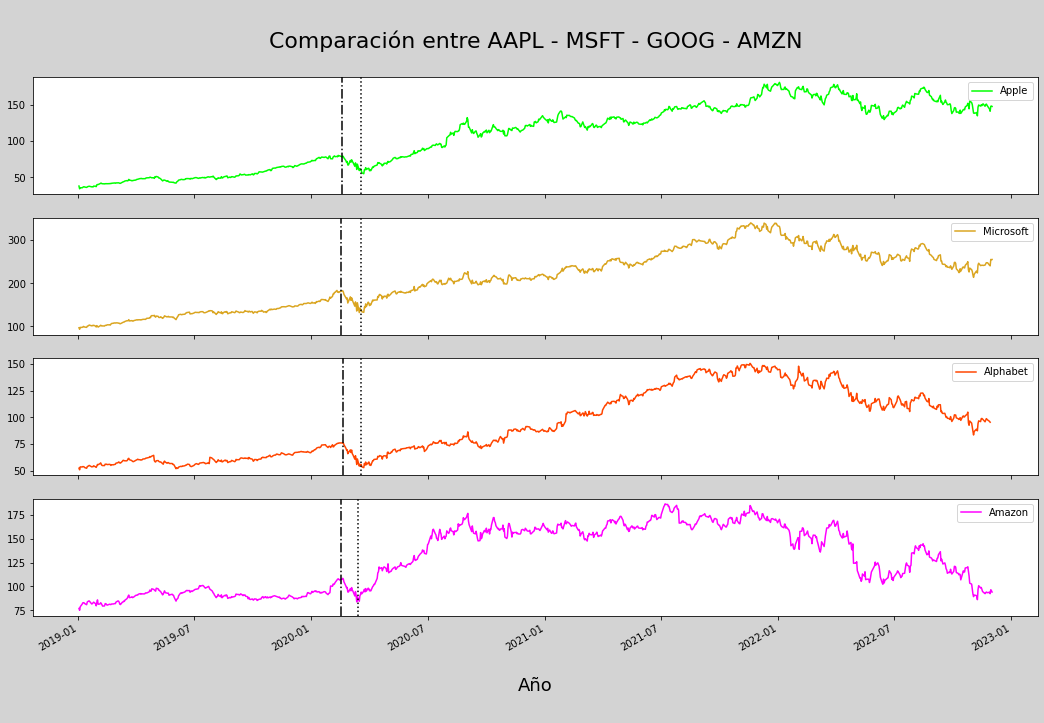

In [10]:
# Calcular la correlación
correlation = precios_acciones_df.corr()
correlation

,AAPL,AMZN,MSFT,GOOG
AAPL,1.000000,0.748896,0.966608,0.914619
AMZN,0.748896,1.000000,0.795760,0.758309
MSFT,0.966608,0.795760,1.000000,0.966830
GOOG,0.914619,0.758309,0.966830,1.000000


<AxesSubplot:>

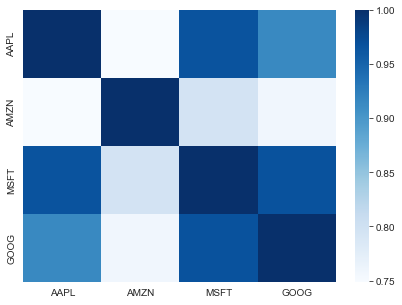

In [13]:
# Heatmap
plt.figure(figsize=(7,5))
sns.heatmap(correlation,
            cmap = 'Blues') # Otros cmaps: Reds, Blues, Greens, OrRd